分析空气质量特征的日内变化幅度和哪些特征有关

现象：连续两天的某个特征的日内变化的幅度相差很大，分析可能和哪些因素有关？
可能的原因：星期几？节假日？当天/之前一天的天气？

星期几

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from feature_range_one_week import station_feature_week

In [2]:
bj = pd.read_csv("preprocessed_data/before_split/bj_aq_data.csv")

In [3]:
bj = bj[bj.time > "2017-01-01 23:00:00"]

In [4]:
bj.head()

,time,fangshan_aq_PM2.5,fangshan_aq_PM10,fangshan_aq_NO2,fangshan_aq_CO,fangshan_aq_O3,fangshan_aq_SO2,qianmen_aq_PM2.5,qianmen_aq_PM10,qianmen_aq_NO2,...,fengtaihuayuan_aq_NO2,fengtaihuayuan_aq_CO,fengtaihuayuan_aq_O3,fengtaihuayuan_aq_SO2,miyunshuiku_aq_PM2.5,miyunshuiku_aq_PM10,miyunshuiku_aq_NO2,miyunshuiku_aq_CO,miyunshuiku_aq_O3,miyunshuiku_aq_SO2
10,2017-01-02 00:00:00,304.0,404.0,110.0,6.9,4.0,3.0,32.0,305.0,73.0,...,106.0,7.3,8.0,2.0,34.0,302.0,13.0,0.6,31.0,5.0
11,2017-01-02 01:00:00,289.0,399.0,109.0,7.3,6.0,4.0,20.0,220.0,58.0,...,115.0,7.9,9.0,3.0,28.0,261.0,12.0,0.6,37.0,6.0
12,2017-01-02 02:00:00,299.0,457.0,112.0,7.2,10.0,4.0,23.0,319.0,56.0,...,124.0,7.4,12.0,4.0,19.0,240.0,10.0,0.5,46.0,6.0
13,2017-01-02 03:00:00,319.0,310.0,111.0,6.9,22.0,8.0,219.0,479.0,109.0,...,133.0,7.2,18.0,11.0,17.0,344.0,8.0,0.4,56.0,5.0
14,2017-01-02 04:00:00,352.0,154.0,124.0,0.7,27.0,19.0,347.0,347.0,159.0,...,144.0,6.9,23.0,17.0,11.0,338.0,5.0,0.3,69.0,3.0


In [5]:
bj = bj.reset_index()
bj.drop(columns=["index"], inplace=True)
bj.drop(["time"], axis=1, inplace=True)

In [6]:
days = []
for i in range(0, bj.shape[0], 24):    
    df = bj.loc[i:i+23]    
    if not pd.isnull(df).any().any():
        days.append(df)

In [7]:
delta_list = []
for i in range(len(days)):
    day_min = days[i].min()  
    day_max = days[i].max()
    delta = day_max - day_min
    delta_list.append(delta)

In [8]:
duizhao = ["dingling_aq", "badaling_aq", "miyunshuiku_aq", "donggaocun_aq", "yongledian_aq", "yufa_aq", "liulihe_aq"]
jiaoqu = ["fangshan_aq", "daxing_aq", "yizhuang_aq", "tongzhou_aq", "shunyi_aq", "pingchang_aq", "mentougou_aq", "pinggu_aq", "huairou_aq", "miyun_aq", "yanqin_aq"]
jiaotong = ["qianmen_aq", "yongdingmennei_aq", "xizhimenbei_aq", "nansanhuan_aq", "dongsihuan_aq"]
chengqu = ["dongsi_aq", "tiantan_aq", "guanyuan_aq", "wanshouxigong_aq", "aotizhongxin_aq", "nongzhanguan_aq", "wanliu_aq", "beibuxinqu_aq", "zhiwuyuan_aq", "fengtaihuayuan_aq", "yungang_aq", "gucheng_aq"]

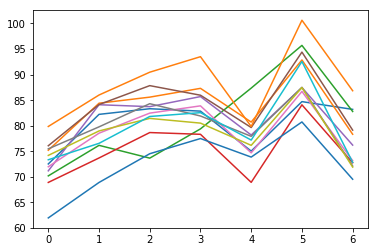

In [9]:
r_chengqu = station_feature_week("bj", bj, chengqu, "PM2.5", delta_list)

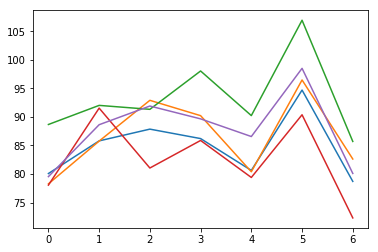

In [10]:
r_jiaotong = station_feature_week("bj", bj, jiaotong, "PM2.5", delta_list)

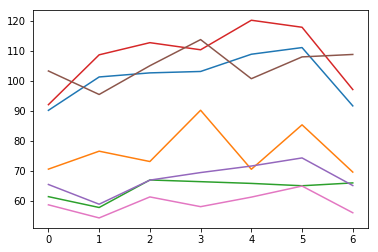

In [11]:
r_duizhao = station_feature_week("bj", bj, duizhao, "PM2.5", delta_list)

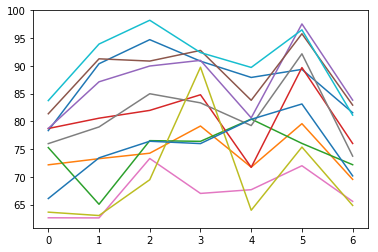

In [12]:
r_jiaoqu = station_feature_week("bj", bj, jiaoqu, "PM2.5", delta_list)

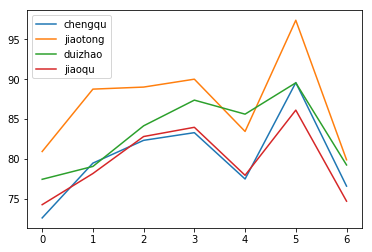

In [13]:
mean_chengqu_PM25 = np.mean(np.array(list(r_chengqu.values())), axis=0)
mean_jiaotong_PM25 = np.mean(np.array(list(r_jiaotong.values())), axis=0)
mean_duizhao_PM25 = np.mean(np.array(list(r_duizhao.values())), axis=0)
mean_jiaoqu_PM25 = np.mean(np.array(list(r_jiaoqu.values())), axis=0)

plt.plot(mean_chengqu_PM25, label="chengqu")
plt.plot(mean_jiaotong_PM25, label="jiaotong")
plt.plot(mean_duizhao_PM25, label="duizhao")
plt.plot(mean_jiaoqu_PM25, label="jiaoqu")

plt.legend();

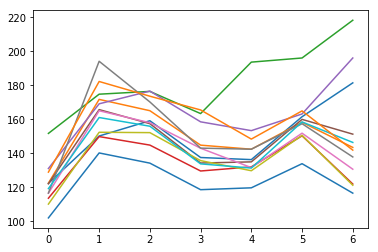

In [14]:
r_chengqu = station_feature_week("bj", bj, chengqu, "PM10", delta_list)

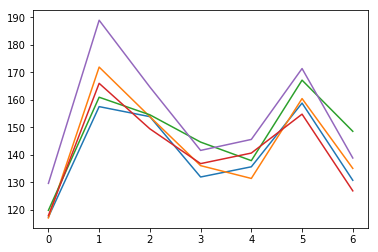

In [15]:
r_jiaotong = station_feature_week("bj", bj, jiaotong, "PM10", delta_list)

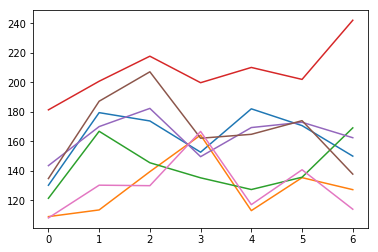

In [16]:
r_duizhao = station_feature_week("bj", bj, duizhao, "PM10", delta_list)

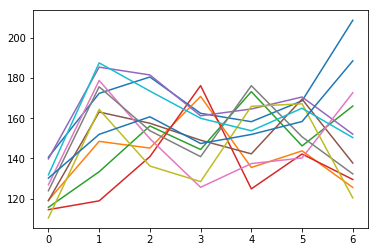

In [18]:
r_jiaoqu = station_feature_week("bj", bj, jiaoqu, "PM10", delta_list)

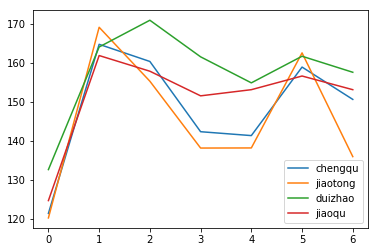

In [19]:
mean_chengqu_PM10 = np.mean(np.array(list(r_chengqu.values())), axis=0)
mean_jiaotong_PM10 = np.mean(np.array(list(r_jiaotong.values())), axis=0)
mean_duizhao_PM10 = np.mean(np.array(list(r_duizhao.values())), axis=0)
mean_jiaoqu_PM10 = np.mean(np.array(list(r_jiaoqu.values())), axis=0)

plt.plot(mean_chengqu_PM10, label="chengqu")
plt.plot(mean_jiaotong_PM10, label="jiaotong")
plt.plot(mean_duizhao_PM10, label="duizhao")
plt.plot(mean_jiaoqu_PM10, label="jiaoqu")

plt.legend();

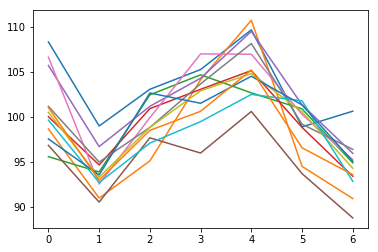

In [20]:
r_chengqu = station_feature_week("bj", bj, chengqu, "O3", delta_list)

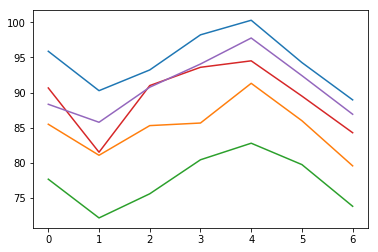

In [21]:
r_jiaotong = station_feature_week("bj", bj, jiaotong, "O3", delta_list)

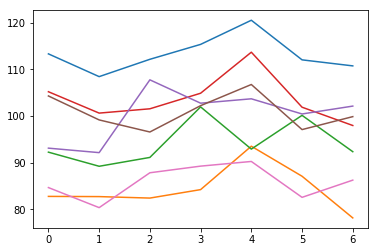

In [22]:
r_duizhao = station_feature_week("bj", bj, duizhao, "O3", delta_list)

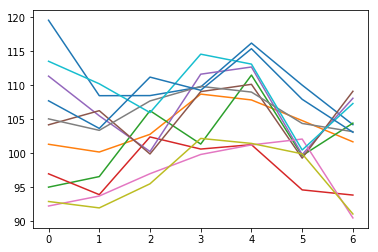

In [23]:
r_jiaoqu = station_feature_week("bj", bj, jiaoqu, "O3", delta_list)

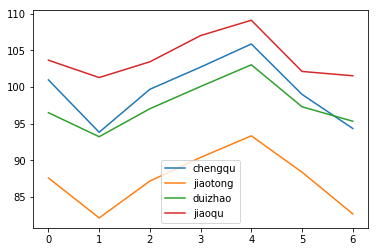

In [24]:
mean_chengqu_O3 = np.mean(np.array(list(r_chengqu.values())), axis=0)
mean_jiaotong_O3 = np.mean(np.array(list(r_jiaotong.values())), axis=0)
mean_duizhao_O3 = np.mean(np.array(list(r_duizhao.values())), axis=0)
mean_jiaoqu_O3 = np.mean(np.array(list(r_jiaoqu.values())), axis=0)

plt.plot(mean_chengqu_O3, label="chengqu")
plt.plot(mean_jiaotong_O3, label="jiaotong")
plt.plot(mean_duizhao_O3, label="duizhao")
plt.plot(mean_jiaoqu_O3, label="jiaoqu")

plt.legend();

北京的不同类型的站点在一周之内有不同的range变化的特征．因此对四类站点分别讨论．对于伦敦而言，站点相对比较集中，也没有分类，因此就只对不同的空气质量特征（"PM2.5"和"PM10"做一个区别了．

In [25]:
from feature_range_one_week import get_feature_range_one_week

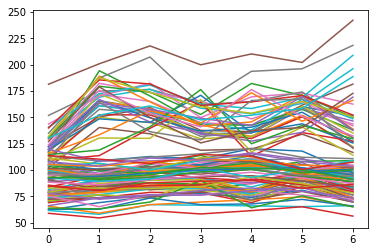

In [26]:
bj_range_one_week = get_feature_range_one_week("bj")

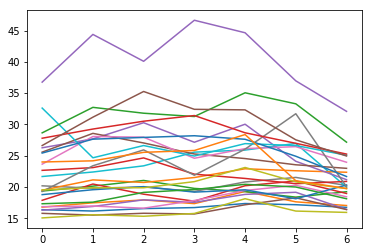

In [27]:
ld_range_one_week = get_feature_range_one_week("ld")

In [28]:
print(bj_range_one_week.shape)
print(ld_range_one_week.shape)

(105, 7)
(26, 7)
